# Resilient Approaches for Mitigating COVID-Induced Fluctuations in Time Series Data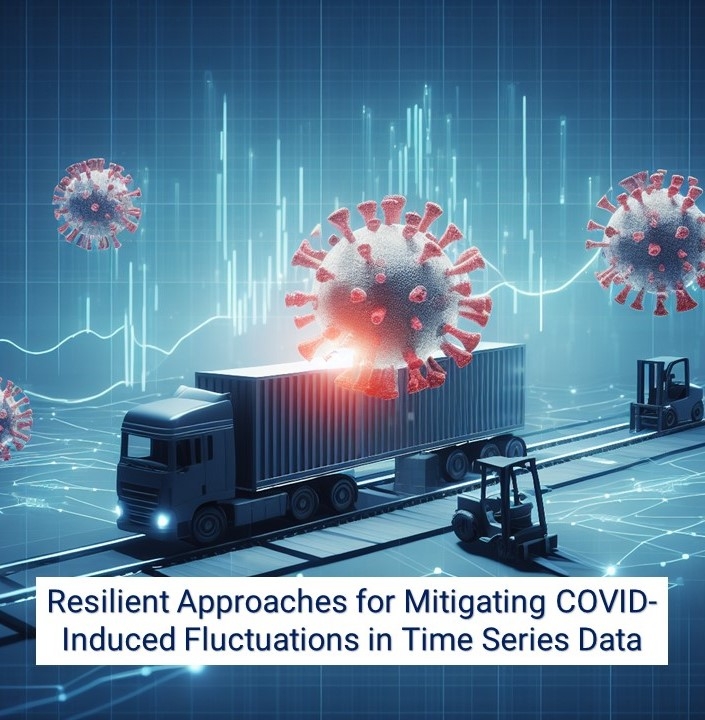

The impact of COVID-19 has been profound and far-reaching, reshaping virtually every aspect of society. It has fundamentally altered the way we live, work, interact, and conduct business.

Economically, it triggered disruptions across industries, leading to widespread job losses, business closures, and financial instability for many individuals and businesses. The shift to remote work became the norm for numerous professions, highlighting the importance of digital infrastructure and altering workplace dynamics.

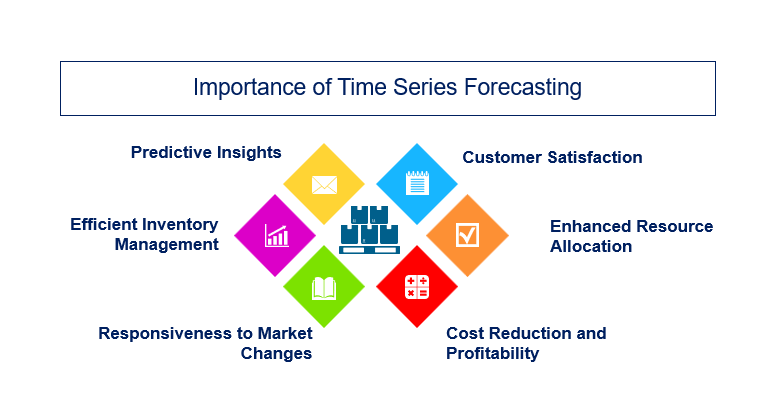 The impact of COVID-19 disruptions on datasets, particularly in the context of supply chain dynamics, is evident through the emergence of outlier sequences. These irregular data patterns, reflective of the unprecedented disturbances in business operations, pose significant challenges for data analysts and forecasters. Addressing these anomalies is critical for enhancing the reliability of predictive models essential for strategic decision-making. This research aims to propose novel methodological approaches to effectively identify and manage outlier sequences induced by pandemic-related disruptions, thereby advancing the accuracy of forecasting models in contemporary business environments.

## What is a Time Series?

A time series, or a sequence of data, represents an ordered collection 𝑇 = {𝑇1,𝑇2, . . . ,𝑇𝑚} of 𝑚 real-valued data points, each potentially having multiple dimensions where 𝑇𝑖 ∈ R 𝑛. This sequence captures data points recorded or measured at consecutive time intervals, usually following a consistent pattern. Its primary purpose is to track changes in a variable over time, providing valuable insights for predicting trends, anomalies, or patterns in various fields such as finance, economics, weather, and beyond. By examining past behaviors, time series data assists in making informed decisions and anticipating future outcomes.


Time series forecasting is crucial for planning demand and sales forecasts in supply chain management. Here's why it matters:

1.  Predictive Insights: By studying historical data, time series forecasting predicts future demand, helping companies prepare for specific quantities of goods needed at different times.

2.  Efficient Inventory Management: Accurate sales forecasts enable better inventory management, preventing situations of having too much or too little stock. This cuts down on excess inventory costs and ensures products are available when required.

3. Enhanced Resource Allocation: Forecasting helps allocate resources like labor, materials, and production capacity more efficiently across the supply chain, maximizing their utilization.

4. Responsiveness to Market Changes: Accurate forecasts allow quick adjustments to changing market demands. This flexibility helps in managing production schedules, logistics, and procurement strategies, especially during unexpected events like the COVID-19 pandemic.

5. Cost Reduction and Profitability: Better demand planning lowers costs linked to overstocking or running out of inventory. This reduction in wastage and efficient supply management ultimately leads to higher profits.

6. Customer Satisfaction: Meeting demand accurately leads to satisfied customers. Improved forecasting ensures timely product availability and better customer service, fostering loyalty.


So, lets deep dive into a dataset and see how COVID has impaired forecasting problems.

## Investigation into the Scenario

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_percentage_error
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error



## Let us load the dataset

In [2]:
# Read the CSV file 'sales.csv' and store it in the DataFrame sales_data
sales_data = pd.read_csv('sales.csv')

# Convert the 'Date' column to datetime format to ensure proper date handling
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Set the 'Date' column as the index of the DataFrame, making it the DataFrame's index
sales_data.set_index('Date', inplace=True)


<ipython-input-2-d655bb275590>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales_data['Date'] = pd.to_datetime(sales_data['Date'])


## Now lets visualise our data

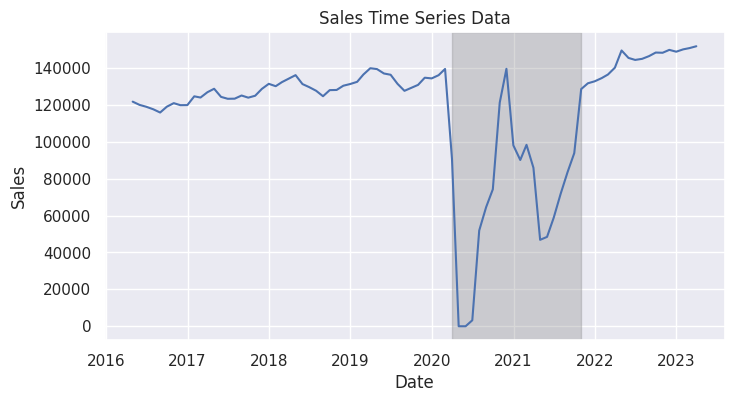

In [3]:
# Set the style for Seaborn plots to 'darkgrid'
sns.set(style="darkgrid")

# Set the figure size for the plot
plt.figure(figsize=(8, 4))

# Create a line plot using Seaborn, specifying the x-axis as the index of sales_data and the 'Sales' column as the y-axis data
sns.lineplot(x=sales_data.index, y='Sales', data=sales_data)

# Add a shade or highlight to the specified time frame ('2020-03-31' to '2021-10-31')
plt.axvspan('2020-03-31', '2021-10-31', color='grey', alpha=0.3)

# Label the x-axis as 'Date', y-axis as 'Sales', and set the title of the plot
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Time Series Data')

# Display the plot
plt.show()


## STL Decomposition:
The application of STL (Seasonal and Trend decomposition using Loess) involves disassembling time series data into distinct elements: trend, seasonal patterns, and residual fluctuations. This method facilitates trend identification, seasonal pattern recognition, and anomaly detection within the data, offering valuable insights for forecasting and modeling. STL's ability to dissect temporal complexities provides a nuanced understanding for comprehensive time series analysis in research contexts.

Now, lets do the same for our data.

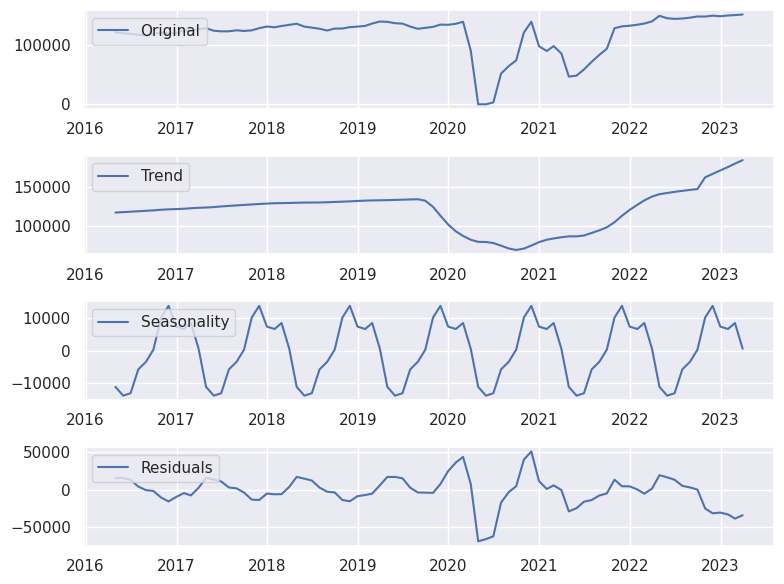

In [4]:
# Decompose the data using STL decomposition
# Apply STL decomposition to the 'Sales' column of sales_data
# 'additive' model is used for the decomposition, allowing the components to be added together
# 'extrapolate_trend' extends the trend line to cover the entire time series frequency
decomposition = seasonal_decompose(sales_data['Sales'], model='additive', extrapolate_trend='freq')

# Retrieve the individual components from the decomposition
trend = decomposition.trend  # Extract the trend component
seasonal = decomposition.seasonal  # Extract the seasonal component
residual = decomposition.resid  # Extract the residual component

# Plot the STL decomposition components
# Set up a multi-plot figure to visualize the original and decomposed components
plt.figure(figsize=(8, 6))

# Original time series plot
plt.subplot(411)  # Subplot for the original time series
plt.plot(sales_data['Sales'], label='Original')  # Plot the original data
plt.legend(loc='upper left')  # Add legend to upper left corner

# Trend component plot
plt.subplot(412)  # Subplot for the trend component
plt.plot(trend, label='Trend')  # Plot the trend component
plt.legend(loc='upper left')  # Add legend to upper left corner

# Seasonal component plot
plt.subplot(413)  # Subplot for the seasonal component
plt.plot(seasonal, label='Seasonality')  # Plot the seasonal component
plt.legend(loc='upper left')  # Add legend to upper left corner

# Residual component plot
plt.subplot(414)  # Subplot for the residual component
plt.plot(residual, label='Residuals')  # Plot the residual component
plt.legend(loc='upper left')  # Add legend to upper left corner

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


## ADF Test:

The Augmented Dickey-Fuller (ADF) test assesses a time series for stationarity by examining its unit root presence. It evaluates whether a dataset's fluctuations are consistent or exhibit a trend. This test holds significance in determining the temporal behavior of data, aiding in validating statistical models and ensuring accurate analysis in research investigations.

In [5]:
# Perform Augmented Dickey-Fuller Test to check stationarity
adf_result = adfuller(sales_data['Sales'])

# Extract ADF statistic, p-value, and critical values
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

# Display ADF statistic and p-value rounded to four decimal places
print(f"ADF Statistic: {adf_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Display Critical Values rounded to four decimal places
print("Critical Values:", [f"{key}: {value:.4f}" for key, value in critical_values.items()])

# Check if the data is stationary based on the p-value
if p_value > 0.05:
    print("The data is not stationary.")
else:
    print("The data is stationary.")


ADF Statistic: -3.3251
p-value: 0.0138
Critical Values: ['1%: -3.5127', '5%: -2.8975', '10%: -2.5859']
The data is stationary.


 In the next step, some functions will be defined to generate accuracy metrics and the forecast. This research will be using a simple LSTM model to generate the forecast.

In [6]:
def accuracy_metrics(y_true, y_pred):
    """
    Calculate various accuracy metrics between predicted and true values.

    Algorithm:
    1. Compute Mean Absolute Error (MAE) between true and predicted values.
    2. Compute Root Mean Squared Error (RMSE) between true and predicted values.
    3. Calculate Mean Absolute Percentage Error (MAPE).
    4. Calculate Symmetric Mean Absolute Percentage Error (SMAPE).
    5. Compute Median Absolute Percentage Error (MDAPE).
    6. Calculate Geometric Mean Relative Absolute Error (GMRAE).
    7. Create a DataFrame storing computed metrics: 'Metric' and corresponding 'Value'.
    8. Return the DataFrame containing accuracy metrics.

    Parameters:
    - y_true: Array-like or Series of true values.
    - y_pred: Array-like or Series of predicted values.

    Returns:
    - metrics_df: DataFrame containing computed accuracy metrics.
    """

    # Compute Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)

    # Compute Root Mean Squared Error (RMSE)
    rmse = mean_squared_error(y_true, y_pred, squared=False)

    # Calculate Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Calculate Symmetric Mean Absolute Percentage Error (SMAPE)
    smape = np.mean((np.abs(y_true - y_pred) / ((np.abs(y_true) + np.abs(y_pred)) / 2))) * 100

    # Compute Median Absolute Percentage Error (MDAPE)
    mdape = np.median(np.abs((y_true - y_pred) / y_true)) * 100

    # Calculate Geometric Mean Relative Absolute Error (GMRAE)
    gmrae = np.prod(np.abs((y_true - y_pred) / y_true) ** (1 / len(y_true))) * 100

    # Create DataFrame to store computed metrics
    metrics_df = pd.DataFrame({
        'Metric': ['MAE', 'RMSE', 'MAPE', 'SMAPE', 'MDAPE', 'GMRAE'],
        'Value': [mae, rmse, mape, smape, mdape, gmrae]
    })

    # Return DataFrame containing accuracy metrics
    return metrics_df


In [7]:
def generate_forecast(data):
    """
    Generates sales forecast using LSTM model and evaluates accuracy metrics.

    Algorithm:
    1. Normalize input data using MinMaxScaler to bring data within a consistent range.
    2. Prepare data for LSTM by creating sequences of length 'sequence_length' for input features and output labels.
    3. Split the data into training and validation sets for model evaluation.
    4. Build an LSTM model with specified architecture and compile it with the Adam optimizer and mean squared error loss.
    5. Train the LSTM model with early stopping to prevent overfitting.
    6. Generate forecasts using the trained model.
    7. Inverse transform forecasted values and validation labels to their original scales.
    8. Calculate accuracy metrics by comparing forecasted and original sales data.
    9. Display and print the computed accuracy metrics.
    10. Visualize the forecasted and actual sales data using a line plot.

    Parameters:
    - data: DataFrame with dates as index and 'Sales' column as the univariate data.

    Returns:
    - None (Displays forecast plot and prints accuracy metrics).
    """

    # Normalize the data using MinMaxScaler
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)

    # Prepare data for LSTM with sequences of length 'sequence_length'
    sequence_length = 12
    X, y = [], []
    for i in range(len(scaled_data) - sequence_length):
        X.append(scaled_data[i:i+sequence_length])
        y.append(scaled_data[i+sequence_length])
    X, y = np.array(X), np.array(y)

    # Split data into train and validation sets
    train_size = int(0.8 * len(X))
    X_train, X_val = X[:train_size], X[train_size:]
    y_train, y_val = y[:train_size], y[train_size:]

    # Set random seeds for reproducibility
    np.random.seed(42)
    tf.random.set_seed(42)

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the LSTM model with early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

    # Generate forecast using the trained model
    forecast = model.predict(X_val)

    # Inverse transform forecast and validation data to original scale
    forecast = scaler.inverse_transform(forecast)
    y_val_original = scaler.inverse_transform(y_val)

    # Calculate accuracy metrics using the generated forecast and validation data
    metrics_df = accuracy_metrics(y_val_original, forecast)

    # Display and print accuracy metrics
    print("***********************************************")
    print("The Accuracy Metrics are:")
    print(metrics_df)
    print("***********************************************")

    # Plot the forecast and actual sales data
    plt.figure(figsize=(14, 6))
    plt.plot(data.index, data['Sales'], label='Actual')
    plt.plot(data.index[-len(forecast):], forecast, label='Forecast', color='red')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.title('Sales Forecast using LSTM')
    plt.legend()
    plt.show()


Now let's use this function to generate forecats for our data and check the accuracy metrices.

Epoch 1/50
2/2 [==============================] - 6s 741ms/step - loss: 0.6827 - val_loss: 1.0193
Epoch 2/50
2/2 [==============================] - 0s 150ms/step - loss: 0.6330 - val_loss: 0.9482
Epoch 3/50
2/2 [==============================] - 0s 77ms/step - loss: 0.5848 - val_loss: 0.8808
Epoch 4/50
2/2 [==============================] - 0s 77ms/step - loss: 0.5395 - val_loss: 0.8172
Epoch 5/50
2/2 [==============================] - 0s 70ms/step - loss: 0.4970 - val_loss: 0.7533
Epoch 6/50
2/2 [==============================] - 0s 62ms/step - loss: 0.4505 - val_loss: 0.6850
Epoch 7/50
2/2 [==============================] - 0s 85ms/step - loss: 0.4032 - val_loss: 0.6127
Epoch 8/50
2/2 [==============================] - 0s 124ms/step - loss: 0.3562 - val_loss: 0.5374
Epoch 9/50
2/2 [==============================] - 0s 56ms/step - loss: 0.3043 - val_loss: 0.4570
Epoch 10/50
2/2 [==============================] - 0s 69ms/step - loss: 0.2508 - val_loss: 0.3684
Epoch 11/50
2/2 [=========

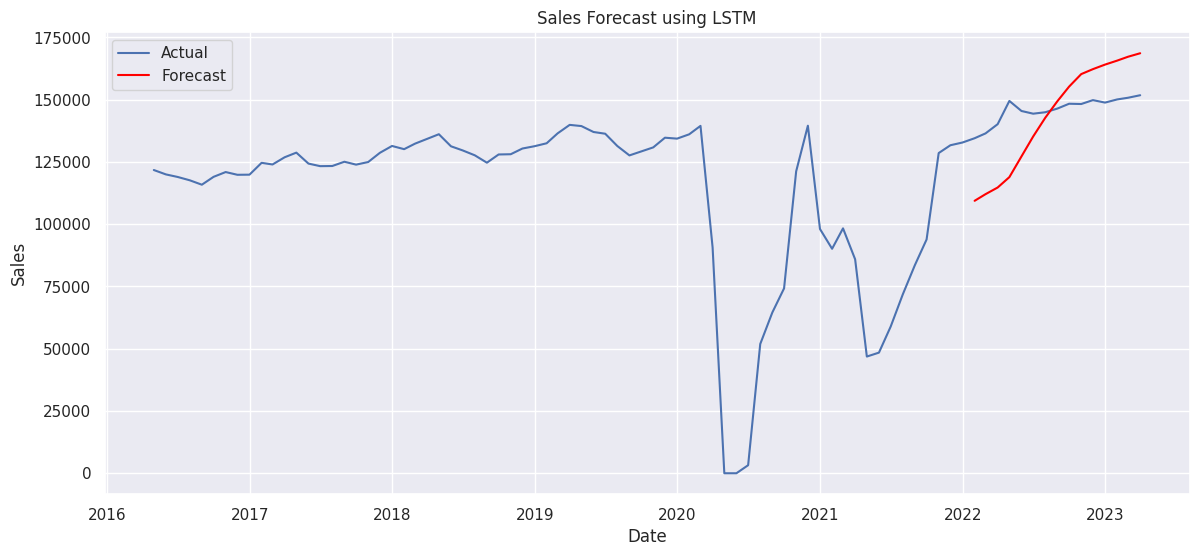

In [8]:
generate_forecast(sales_data)

The dataset spanning March 2020 to October 2021 demonstrates an outlier sequence. Models trained on this interval produce forecasts with notably high MAPE values, signifying reduced accuracy. Consequently, addressing this outlier sequence is imperative to enhance forecast precision and model reliability.

## Approach 1: Replacement with Forecasted Values
In our data, like in most data effected by COVID, presence of an outlier sequence is observed within the dataset spanning March 2020 to October 2021. So a new methodology is proposed here to deal with this outlier sequence.

The dataset is delimited, encompassing records up to February 2020, subsequently employed to generate an LSTM-based forecast extending to the following 20 months. These forecasted values, extrapolated from the model, are then strategically utilized to supplant the actual values within the dataframe, constituting a methodological adjustment to enhance predictive accuracy and account for future trends.

In [9]:
# Define the end date for data selection
end_date = pd.to_datetime('2020-03-01')

# Select historical data up to the specified end date
historical_data = sales_data[sales_data.index <= end_date]

# Display the tail of the selected historical data
historical_data.head()


,Sales
Date,
2016-04-30,121764.05
2016-05-31,120000.16
2016-06-30,118978.74
2016-07-31,117640.89
2016-08-31,115867.56


In [10]:
# Prepare the data for LSTM
scaler = MinMaxScaler()  # Initialize MinMaxScaler for normalization
scaled_data = scaler.fit_transform(historical_data['Sales'].values.reshape(-1, 1))  # Normalize 'Sales' data

sequence_length = 12  # Define the length of the input sequence
X, y = [], []  # Initialize lists for input sequences and labels

# Create input sequences and corresponding labels
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i+sequence_length])
    y.append(scaled_data[i+sequence_length])
X, y = np.array(X), np.array(y)  # Convert lists to NumPy arrays

# Build and train the LSTM model
model = Sequential()  # Initialize sequential model
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))  # Add LSTM layer
model.add(Dense(1))  # Add output layer
model.compile(optimizer='adam', loss='mean_squared_error')  # Compile the model
model.fit(X, y, epochs=50, batch_size=32)  # Train the model

# Generate forecasts for specified date range
forecast_start = datetime(2020, 3, 1)  # Define start date for forecasting
forecast_end = datetime(2021, 11, 1)  # Define end date for forecasting
forecast_dates = pd.date_range(start=forecast_start, end=forecast_end, freq='M')  # Generate date range

forecasted_values = []  # Initialize list for forecasted values

# Iterate through date range to generate forecasts
for i in range(len(forecast_dates) - sequence_length + 1):
    input_sequence = scaled_data[-sequence_length:]  # Extract last 'sequence_length' values for input
    input_sequence = np.reshape(input_sequence, (1, sequence_length, 1))  # Reshape input for prediction
    forecasted_value = model.predict(input_sequence)  # Predict next value using the model
    forecasted_values.append(forecasted_value)  # Store the forecasted value
    scaled_data = np.append(scaled_data, forecasted_value)  # Append forecasted value to the data

# Inverse transform forecasted values to the original scale
forecasted_values = scaler.inverse_transform(np.array(forecasted_values).reshape(-1, 1))

# Create a DataFrame with forecasted dates and values
forecasted_df = pd.DataFrame({'Date': forecast_dates[sequence_length - 1:],
                              'Sales': forecasted_values.flatten()})
forecasted_df.set_index('Date', inplace=True)  # Set 'Date' as index

# Append the forecasted data to the historical sales data
updated_data = pd.concat([historical_data, forecasted_df])  # Concatenate historical and forecasted data


Epoch 1/50
2/2 [==============================] - 3s 12ms/step - loss: 0.3137
Epoch 2/50
2/2 [==============================] - 0s 25ms/step - loss: 0.2872
Epoch 3/50
2/2 [==============================] - 0s 14ms/step - loss: 0.2604
Epoch 4/50
2/2 [==============================] - 0s 18ms/step - loss: 0.2336
Epoch 5/50
2/2 [==============================] - 0s 11ms/step - loss: 0.2059
Epoch 6/50
2/2 [==============================] - 0s 13ms/step - loss: 0.1763
Epoch 7/50
2/2 [==============================] - 0s 15ms/step - loss: 0.1456
Epoch 8/50
2/2 [==============================] - 0s 16ms/step - loss: 0.1139
Epoch 9/50
2/2 [==============================] - 0s 15ms/step - loss: 0.0839
Epoch 10/50
2/2 [==============================] - 0s 15ms/step - loss: 0.0556
Epoch 11/50
2/2 [==============================] - 0s 16ms/step - loss: 0.0354
Epoch 12/50
2/2 [==============================] - 0s 17ms/step - loss: 0.0252
Epoch 13/50
2/2 [==============================] - 0s 16ms/st

In [11]:
updated_data

,Sales
Date,
2016-04-30,121764.050000
2016-05-31,120000.160000
2016-06-30,118978.740000
2016-07-31,117640.890000
2016-08-31,115867.560000
2016-09-30,119022.720000
2016-10-31,120950.090000
2016-11-30,119848.640000
2016-12-31,119896.780000


In [12]:
sales_data.reset_index(inplace=True)  # Resetting the index of 'sales_data' DataFrame

# Filtering the 'sales_data' DataFrame for the specified date range
unaffected_data = sales_data[(sales_data["Date"] >= "2021-11-01") & (sales_data["Date"] <= "2023-04-30")]

unaffected_data  # Displaying the filtered 'unaffected_data'


,Date,Sales
67,2021-11-30,131713.40
68,2021-12-31,132814.48
69,2022-01-31,134529.93
70,2022-02-28,136474.31
71,2022-03-31,140172.54
72,2022-04-30,149505.50
73,2022-05-31,145470.36
74,2022-06-30,144384.10
75,2022-07-31,144967.13
76,2022-08-31,146442.93


In [13]:
unaffected_data.set_index(["Date"], inplace=True)
corrected_sales__df =new = pd.concat([updated_data, unaffected_data])

In [14]:
corrected_sales__df

,Sales
Date,
2016-04-30,121764.05
2016-05-31,120000.16
2016-06-30,118978.74
2016-07-31,117640.89
2016-08-31,115867.56
...,...
2022-11-30,149832.47
2022-12-31,148841.31
2023-01-31,150106.42


Now lets generate forecasts for this corrected dataframe.

Epoch 1/50
2/2 [==============================] - 4s 851ms/step - loss: 0.2099 - val_loss: 0.6637
Epoch 2/50
2/2 [==============================] - 0s 49ms/step - loss: 0.1821 - val_loss: 0.5891
Epoch 3/50
2/2 [==============================] - 0s 79ms/step - loss: 0.1571 - val_loss: 0.5201
Epoch 4/50
2/2 [==============================] - 0s 75ms/step - loss: 0.1342 - val_loss: 0.4553
Epoch 5/50
2/2 [==============================] - 0s 63ms/step - loss: 0.1127 - val_loss: 0.3950
Epoch 6/50
2/2 [==============================] - 0s 154ms/step - loss: 0.0947 - val_loss: 0.3402
Epoch 7/50
2/2 [==============================] - 0s 62ms/step - loss: 0.0776 - val_loss: 0.2883
Epoch 8/50
2/2 [==============================] - 0s 58ms/step - loss: 0.0629 - val_loss: 0.2378
Epoch 9/50
2/2 [==============================] - 0s 62ms/step - loss: 0.0484 - val_loss: 0.1886
Epoch 10/50
2/2 [==============================] - 0s 64ms/step - loss: 0.0351 - val_loss: 0.1416
Epoch 11/50
2/2 [==========

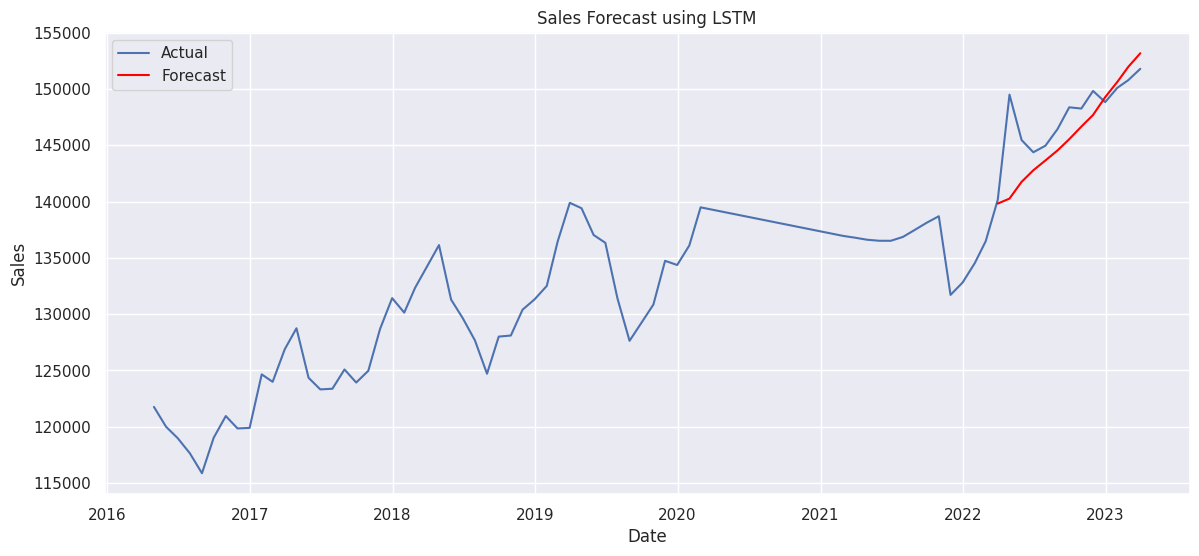

In [15]:
generate_forecast(corrected_sales__df)

The adjustment made to rectify this COVID affected outlier sequences has remarkably enhanced the reliability of our forecasts. This improvement is vividly highlighted by a significant decrease in the Mean Absolute Percentage Error (MAPE) values observed in our forecasts. It clearly demonstrates the remarkable strides taken towards more accurate and precise predictions. This compelling reduction in MAPE values unequivocally emphasizes the substantial refinement achieved in the accuracy of our forecasts, confirming the crucial role of addressing outlier sequences in boosting predictive precision.

## Approach 2: Replacement with Past Year Values

In the alternate method, the dataset spanning March 2020 to October 2021 is substituted with sales figures corresponding to the analogous months in 2019. This approach operates under the assumption that, in the absence of the disruptive influence of the COVID-19 pandemic, the sales trends during these periods would closely mirror those of the preceding year. This substitution strategy enables a comparative analysis, creating a hypothetical scenario reflective of a non-pandemic year for robust forecasting evaluations. This methodological shift facilitates a nuanced exploration of the deviation caused by the pandemic, contributing to a deeper comprehension of its impact on sales dynamics and forecasting accuracy.

In [18]:
pd.set_option('display.max_rows', 100)

In [19]:
# Create a copy of the original 'sales_Data' DataFrame
data = sales_data.copy()

# Set the 'Date' column as the index
data.set_index("Date", inplace=True)

# Extract the data for the year 2019
data_2019 = data[data.index.year == 2019]  # Filter data for the year 2019

# Extract the data for the range '2020-03-01' to '2021-10-31'
data_to_replace = data.loc['2020-03-01':'2021-10-31']  # Filter data for the specified date range

for month in range(13):  # Iterate through months from March (3) to October (10)
    # Extract sales data for each month in 2019
    month_data_2019 = data_2019[data_2019.index.month == month]['Sales']
    # Replace sales data in 'data_to_replace' for corresponding months with 2019 sales values
    data_to_replace.loc[data_to_replace.index.month == month, 'Sales'] = month_data_2019.values

# Update the original DataFrame ('data') with the replaced values for the specified date range
data.loc['2020-03-01':'2021-10-31'] = data_to_replace

data  # Display the updated DataFrame


<ipython-input-19-fed7ebe32bec>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_replace.loc[data_to_replace.index.month == month, 'Sales'] = month_data_2019.values


,Sales
Date,
2016-04-30,121764.05
2016-05-31,120000.16
2016-06-30,118978.74
2016-07-31,117640.89
2016-08-31,115867.56
2016-09-30,119022.72
2016-10-31,120950.09
2016-11-30,119848.64
2016-12-31,119896.78


Now let us generate the forecats for this data

Epoch 1/50
2/2 [==============================] - 3s 375ms/step - loss: 0.2445 - val_loss: 0.7511
Epoch 2/50
2/2 [==============================] - 0s 36ms/step - loss: 0.2219 - val_loss: 0.6948
Epoch 3/50
2/2 [==============================] - 0s 37ms/step - loss: 0.1999 - val_loss: 0.6382
Epoch 4/50
2/2 [==============================] - 0s 36ms/step - loss: 0.1786 - val_loss: 0.5822
Epoch 5/50
2/2 [==============================] - 0s 34ms/step - loss: 0.1578 - val_loss: 0.5275
Epoch 6/50
2/2 [==============================] - 0s 35ms/step - loss: 0.1393 - val_loss: 0.4749
Epoch 7/50
2/2 [==============================] - 0s 33ms/step - loss: 0.1209 - val_loss: 0.4237
Epoch 8/50
2/2 [==============================] - 0s 34ms/step - loss: 0.1033 - val_loss: 0.3722
Epoch 9/50
2/2 [==============================] - 0s 38ms/step - loss: 0.0864 - val_loss: 0.3206
Epoch 10/50
2/2 [==============================] - 0s 39ms/step - loss: 0.0699 - val_loss: 0.2688
Epoch 11/50
2/2 [===========

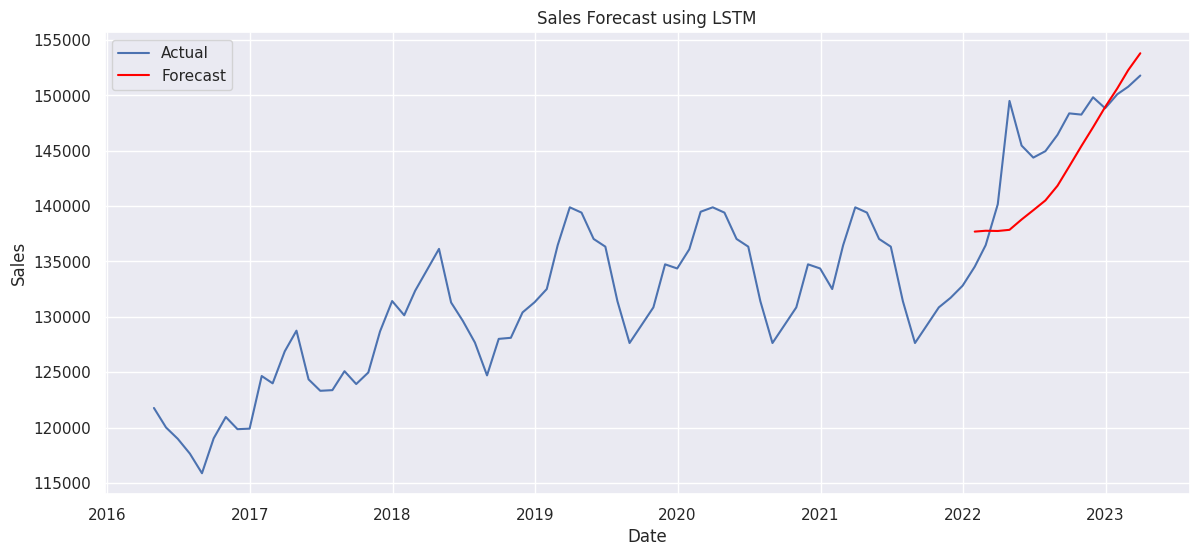

In [20]:
generate_forecast(data)

This strategic method also provides an effective resolution to address outlier sequences resulting from the pandemic's influence. By substituting data affected by the pandemic with corresponding figures from 2019, our forecasting model yields notably diminished Mean Absolute Percentage Error (MAPE) values, indicating enhanced predictive accuracy compared to unprocessed data. This systematic adjustment minimizes pandemic-induced fluctuations, ensuring more reliable forecasts and bolstering overall predictive precision.

## Concluding Remarks

The research, driven by the disruptive impact of COVID-19, aimed to navigate outlier sequences within datasets, particularly prevalent between March 2020 and October 2021. Its goal was to fortify forecast accuracy amid unprecedented disruptions. The findings illuminate two effective strategies: leveraging forecasted values and substituting COVID-affected data with past year figures. These approaches significantly enhanced predictive accuracy, evidenced by substantial reductions in Mean Absolute Percentage Error (MAPE).

These insights suggest that these strategies extend beyond sales forecasting and hold promise in diverse domains, particularly within supply chains. Implementing these methodologies could facilitate more dependable forecasts, empowering supply chain management to anticipate and navigate disruptions with greater precision. This research advocates for practical applications across industries, advocating for the integration of these strategies to enhance forecasting reliability.